In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

The displacement of the mouse during the stimulus time is 34.797095275473424 cm.
The total distance that the mouse travels during the stimulus time is  47.832815587420825 cm.
Mouse reaches point closest to prior shelter location with a linearity ratio of 1.3746209334069206.


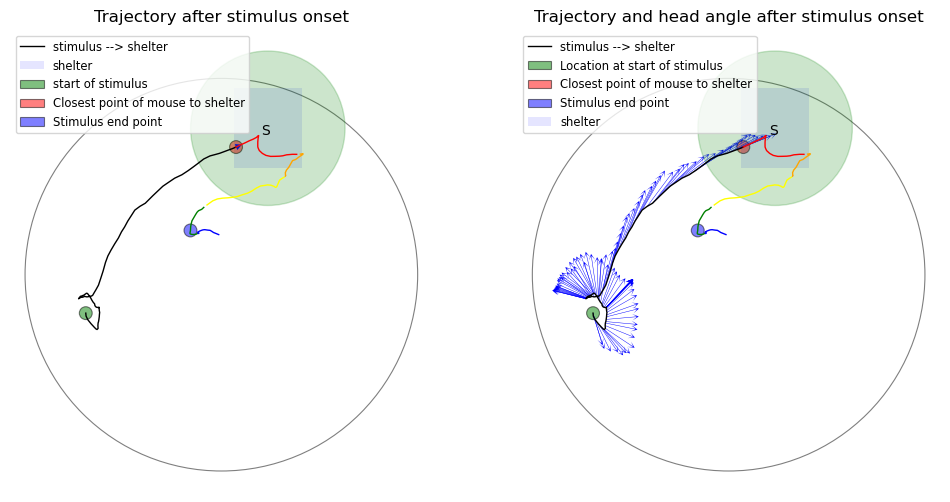

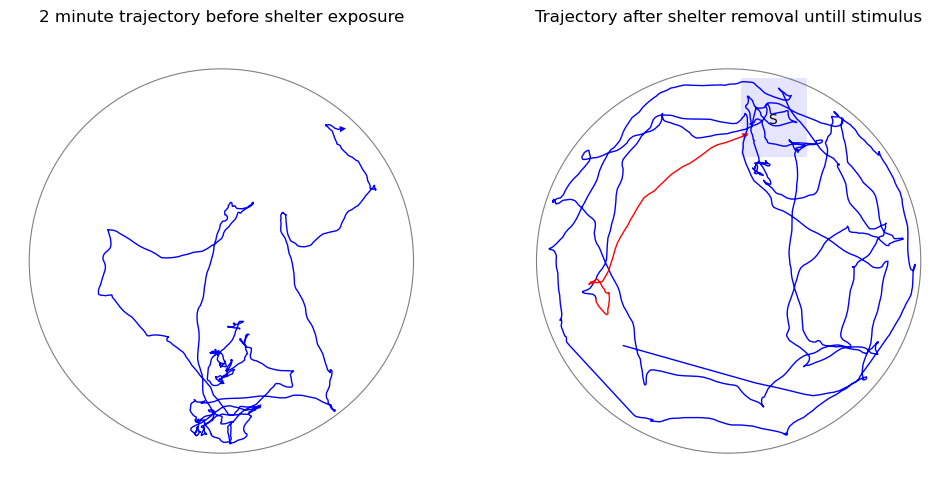

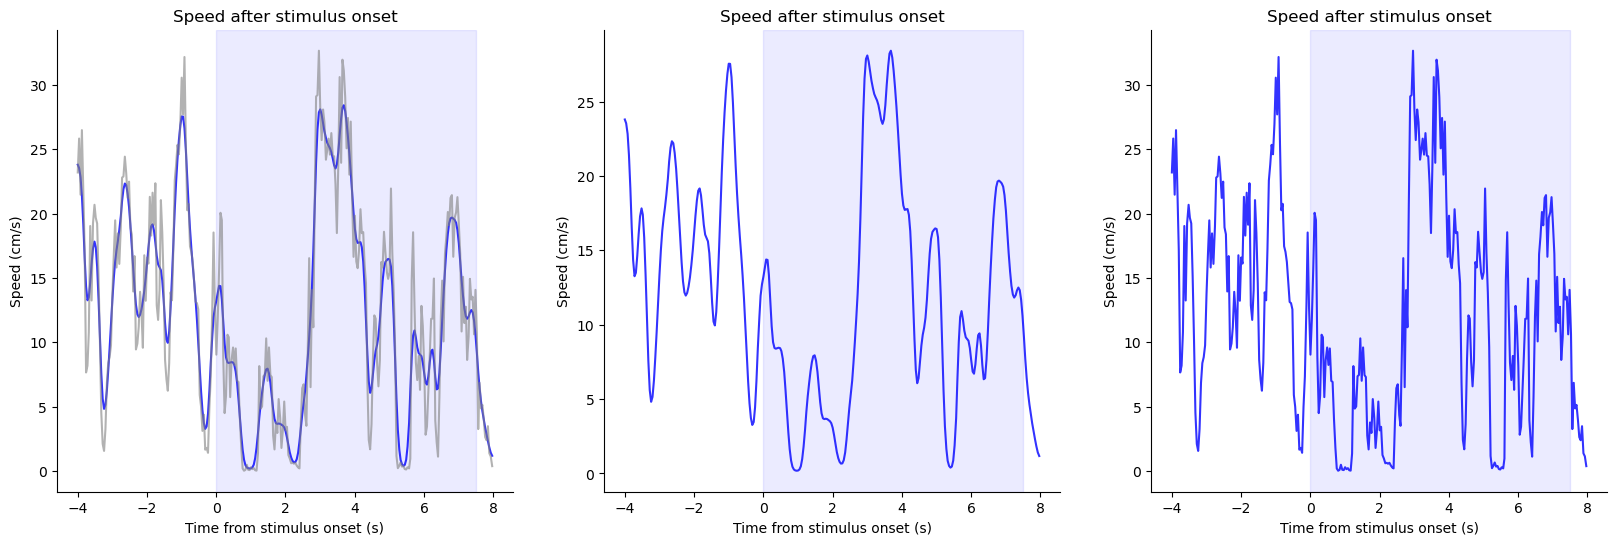

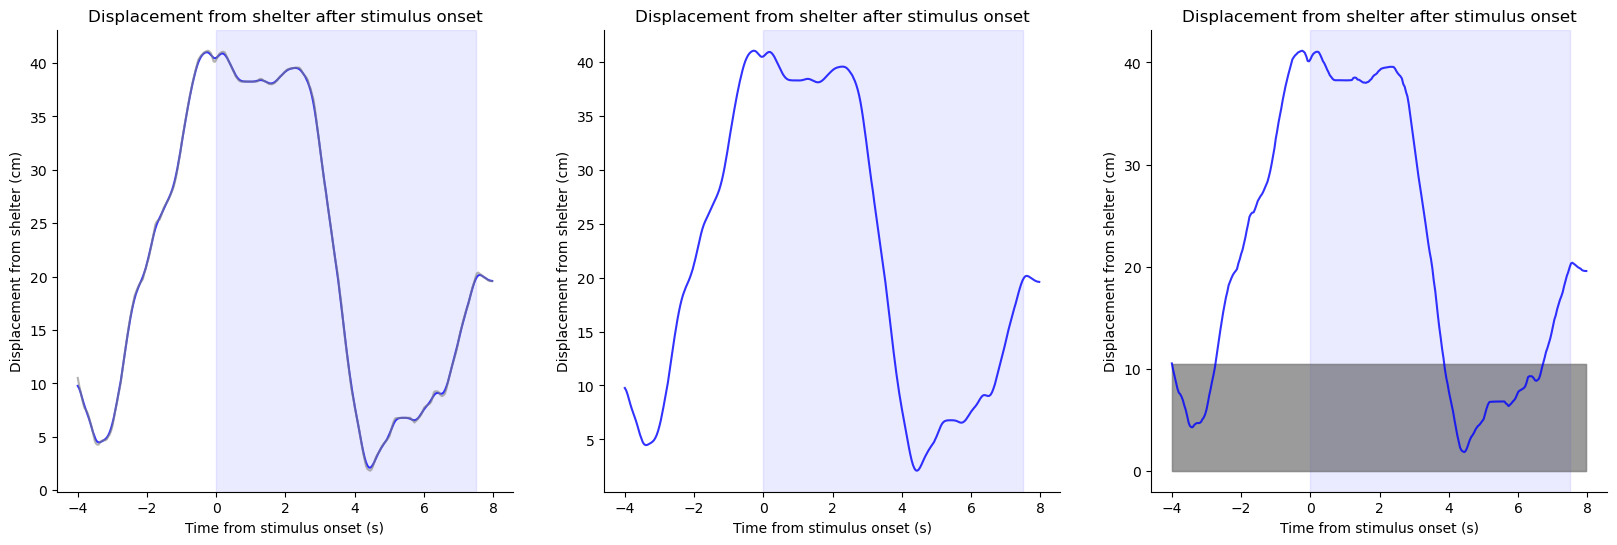

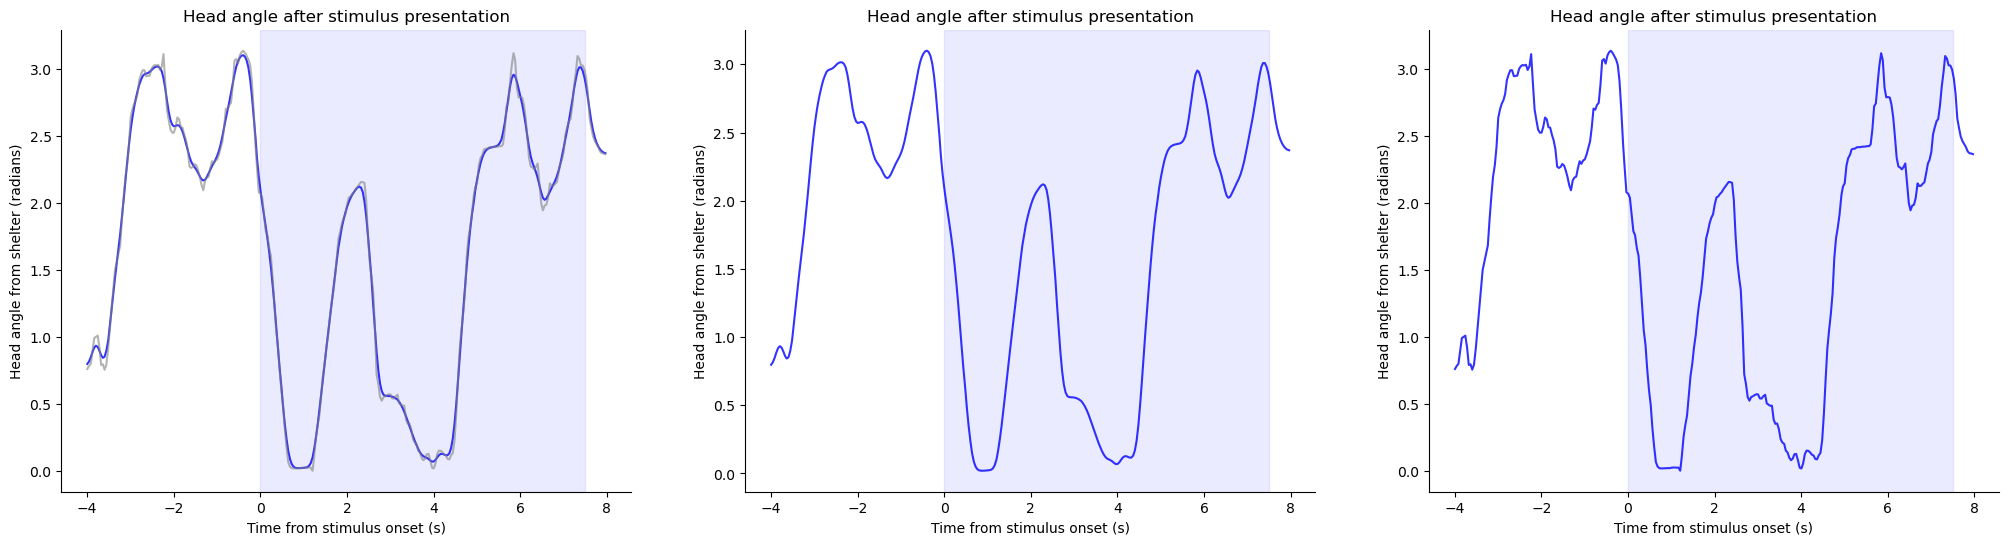

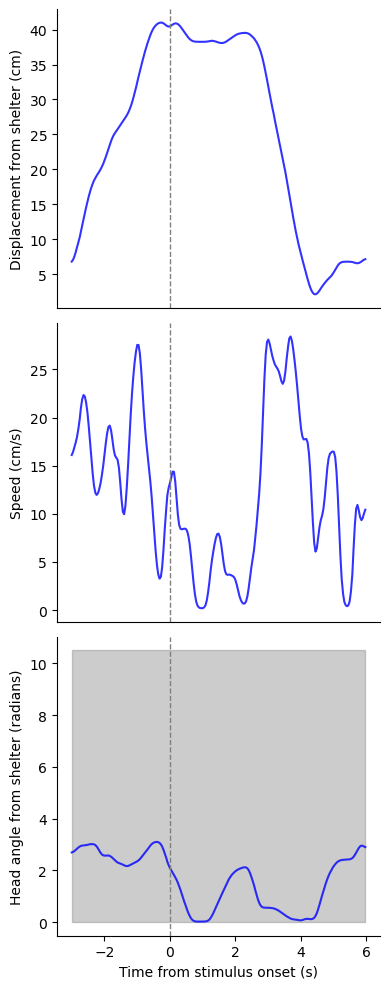

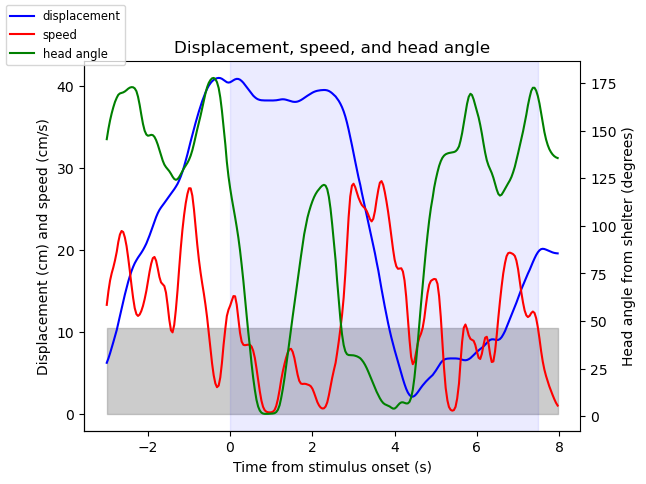

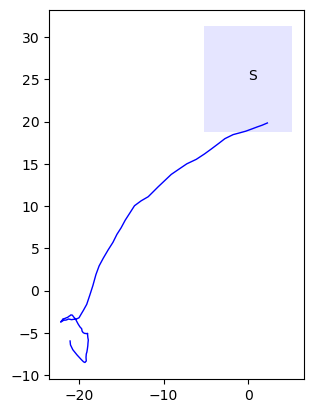

The displacement of the mouse during the stimulus time is 25.87561729069422 cm.
The total distance that the mouse travels during the stimulus time is  33.14164814814793 cm.
Mouse reaches point closest to prior shelter location with a linearity ratio of 1.280806087670296.


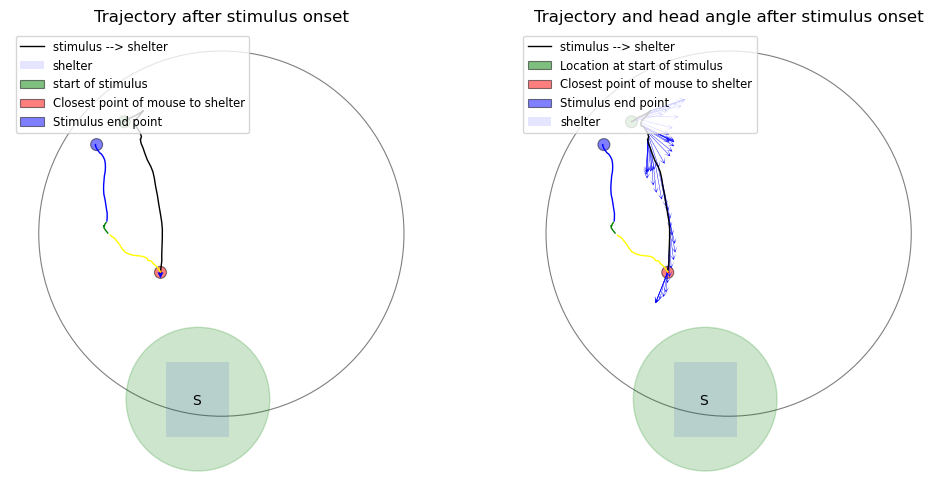

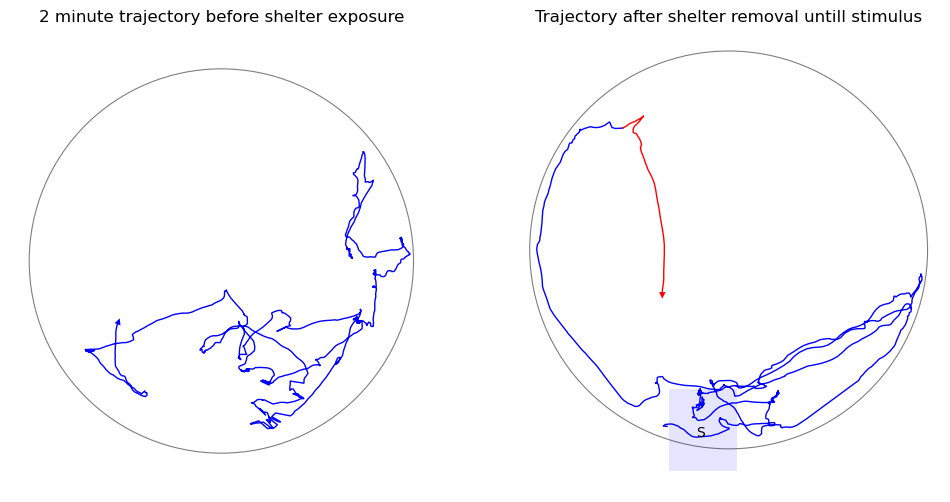

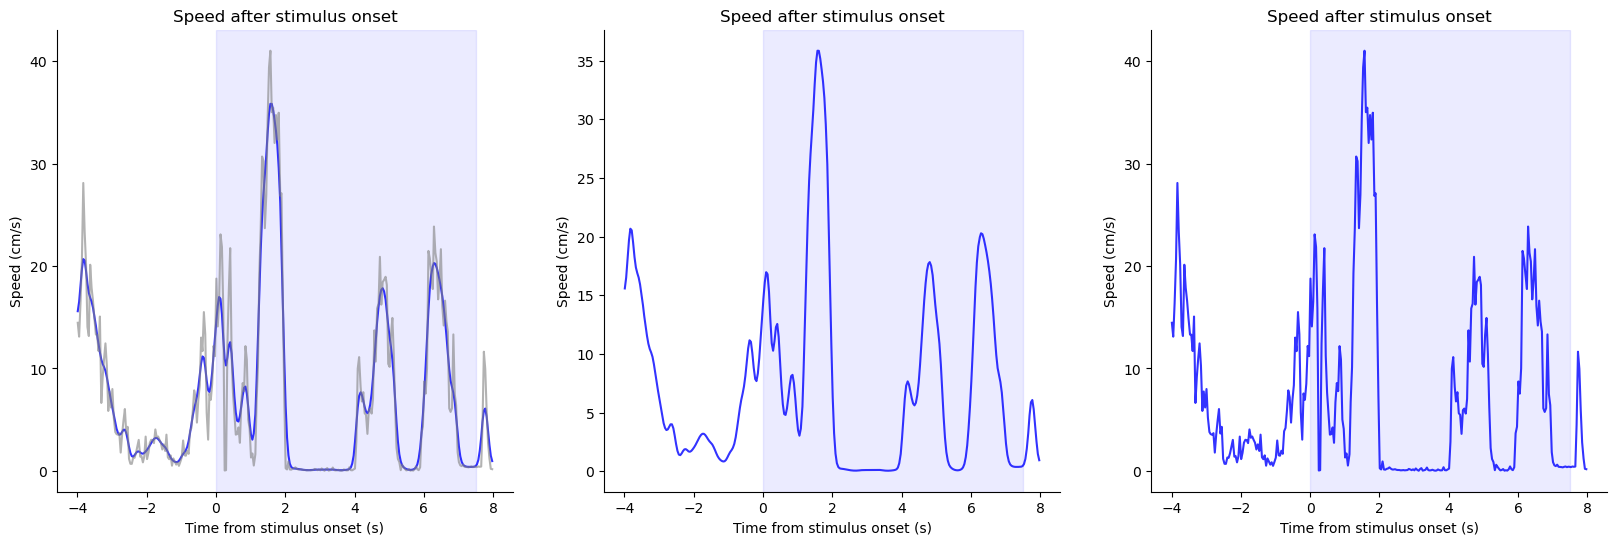

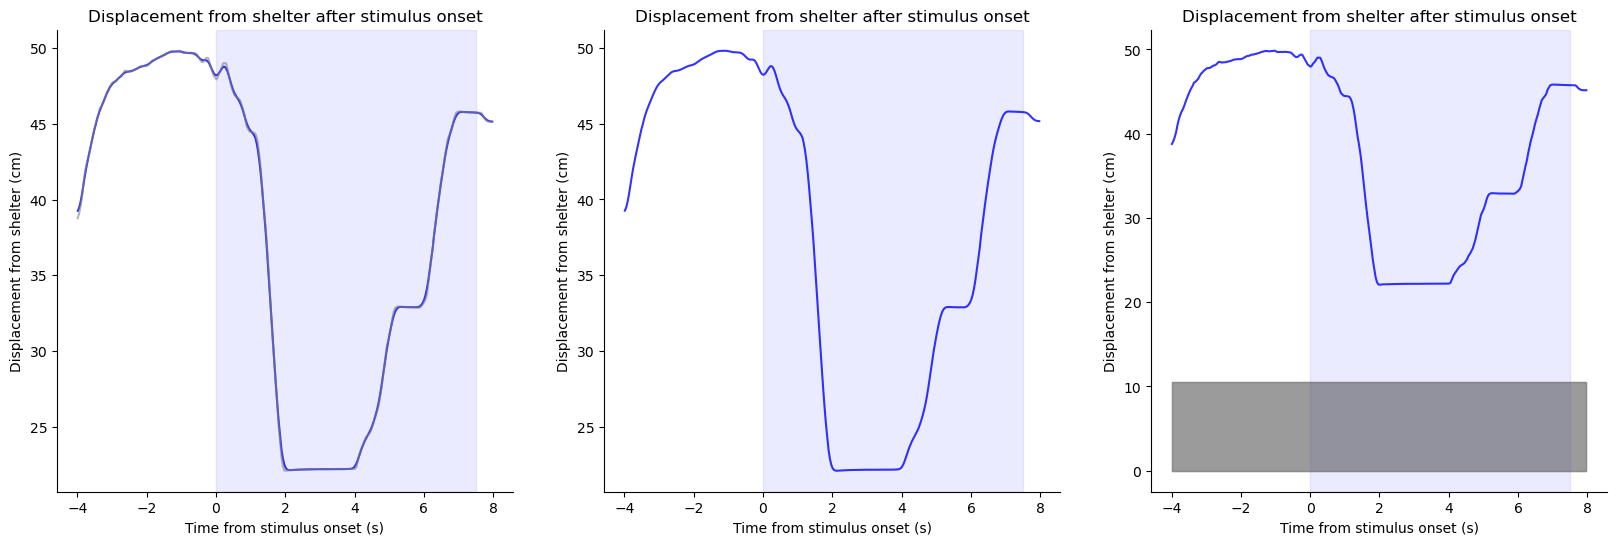

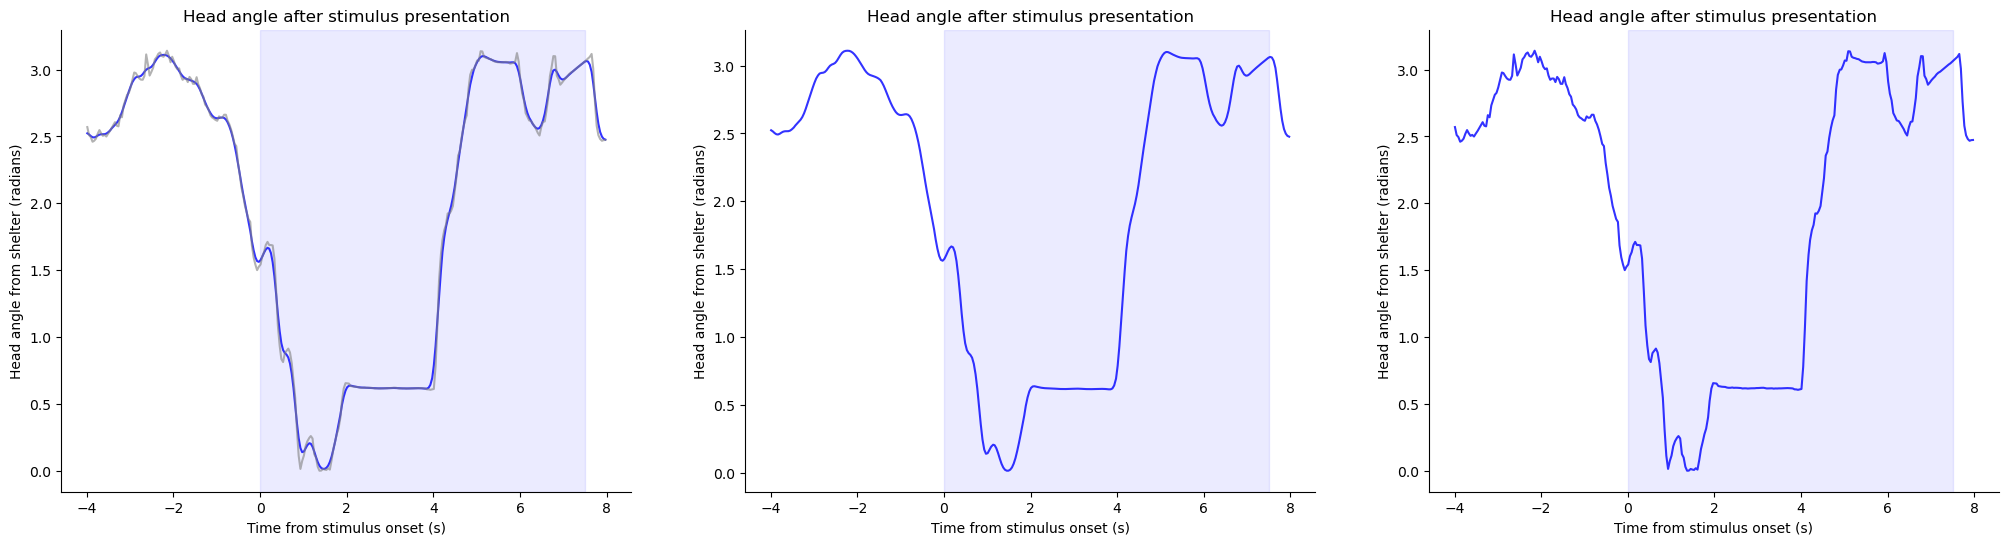

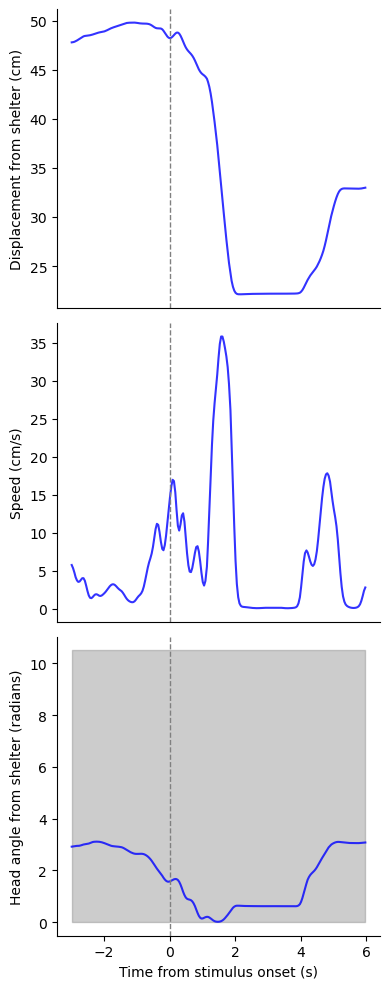

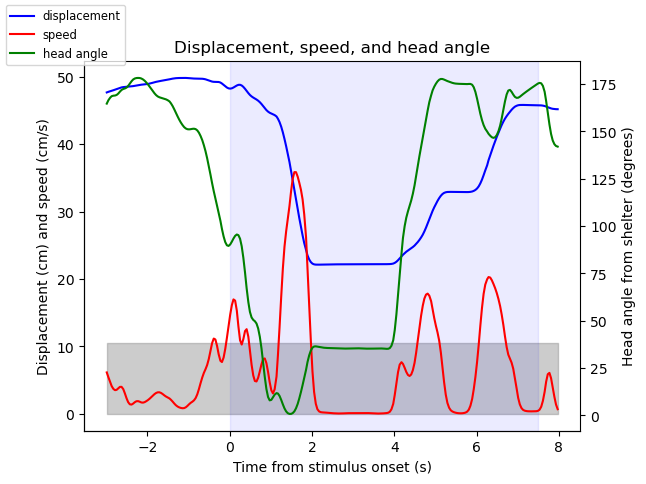

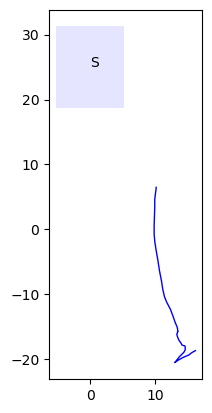

In [2]:
%run compiled_functions_A2A_rerun_Control.ipynb

The displacement of the mouse during the stimulus time is 34.797095275473424 cm.
The total distance that the mouse travels during the stimulus time is  47.832815587420825 cm.
Mouse reaches point closest to prior shelter location with a linearity ratio of 1.3746209334069206.


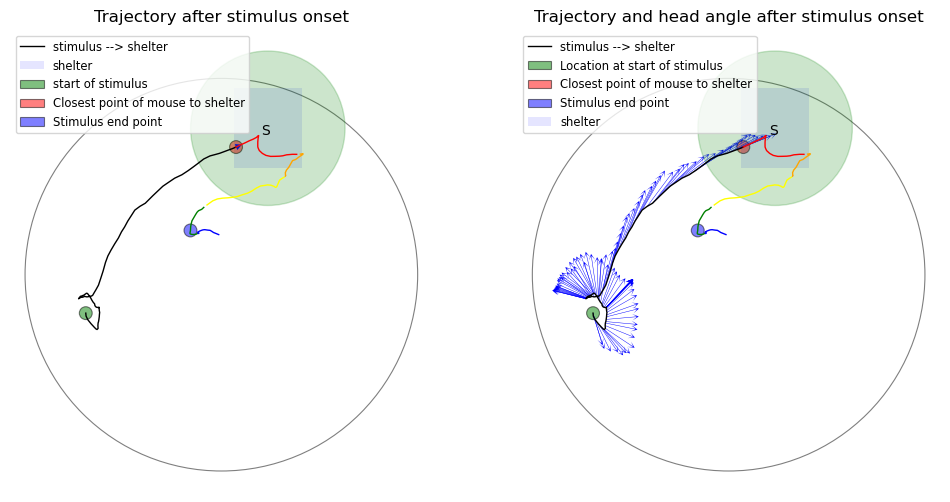

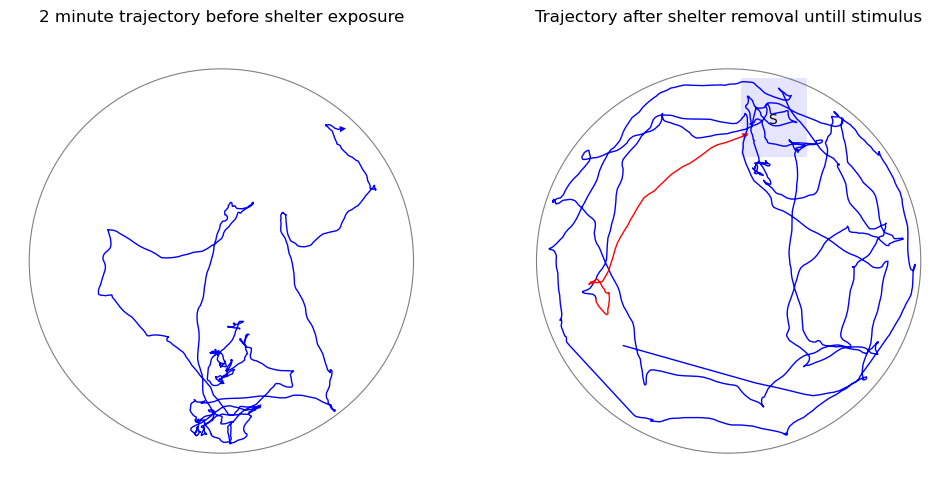

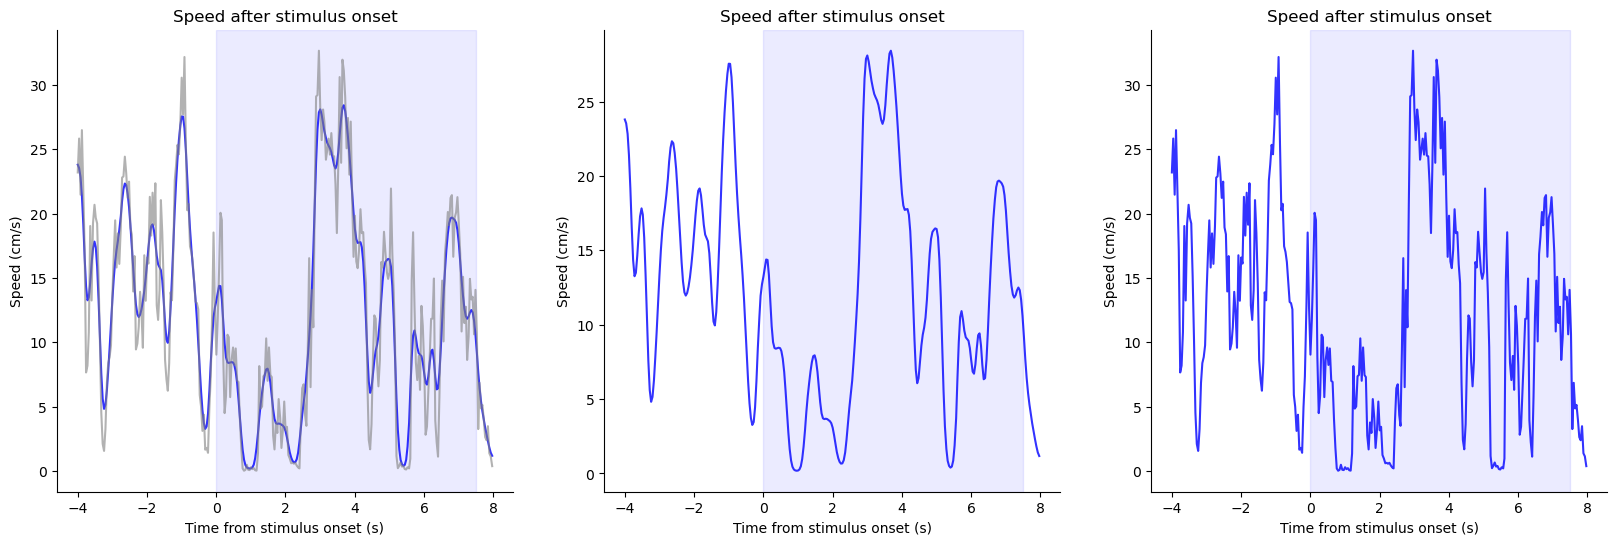

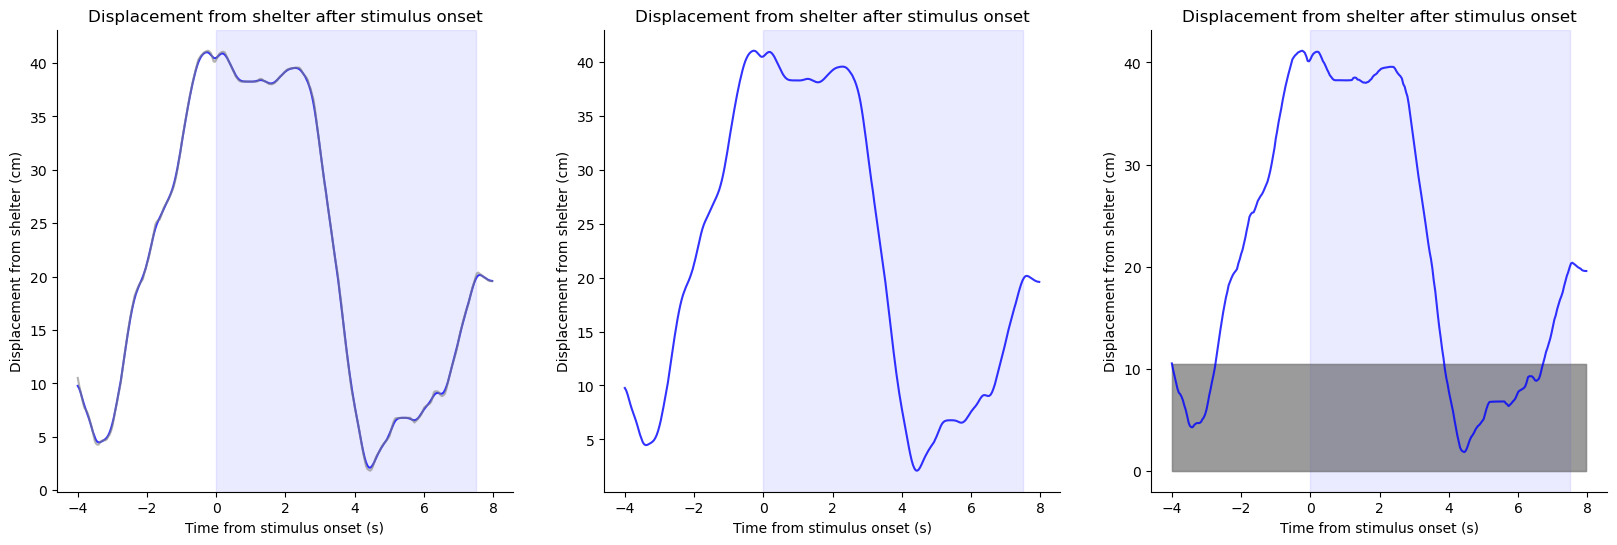

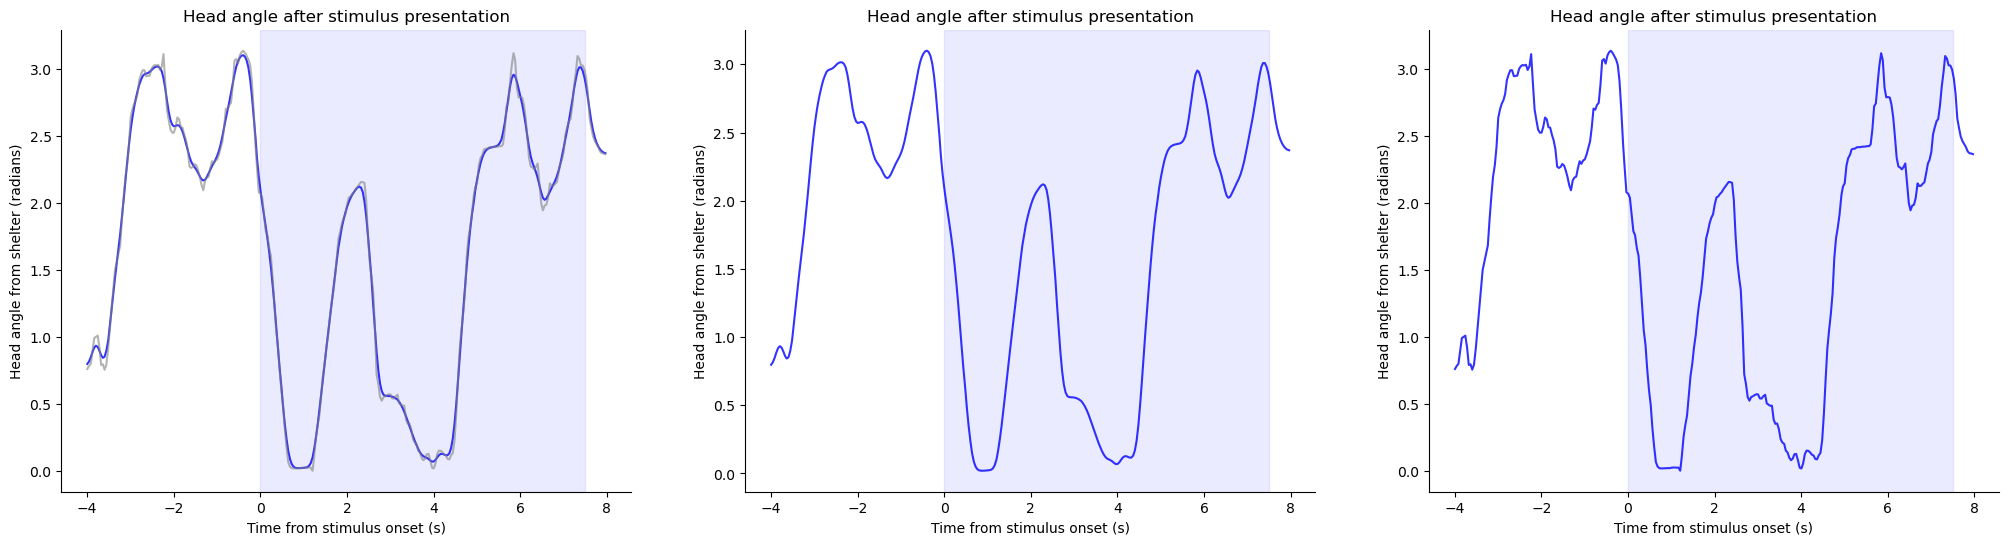

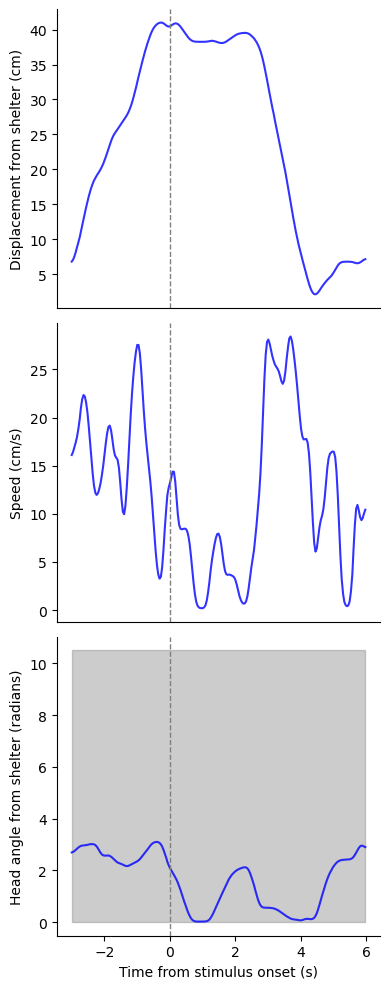

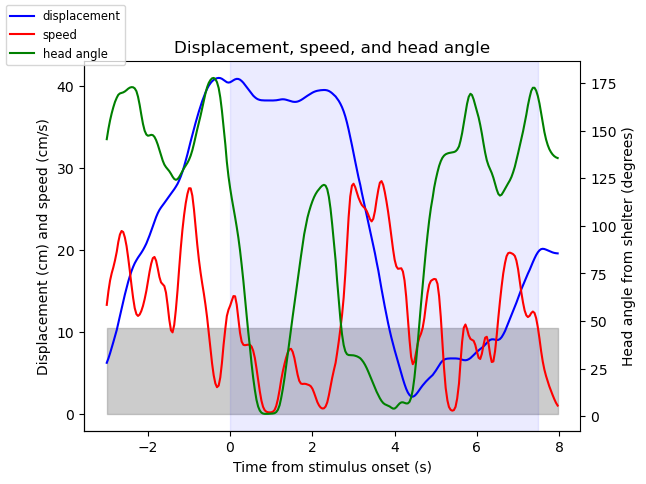

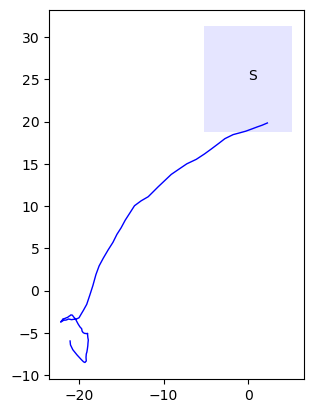

The displacement of the mouse during the stimulus time is 25.87561729069422 cm.
The total distance that the mouse travels during the stimulus time is  33.14164814814793 cm.
Mouse reaches point closest to prior shelter location with a linearity ratio of 1.280806087670296.


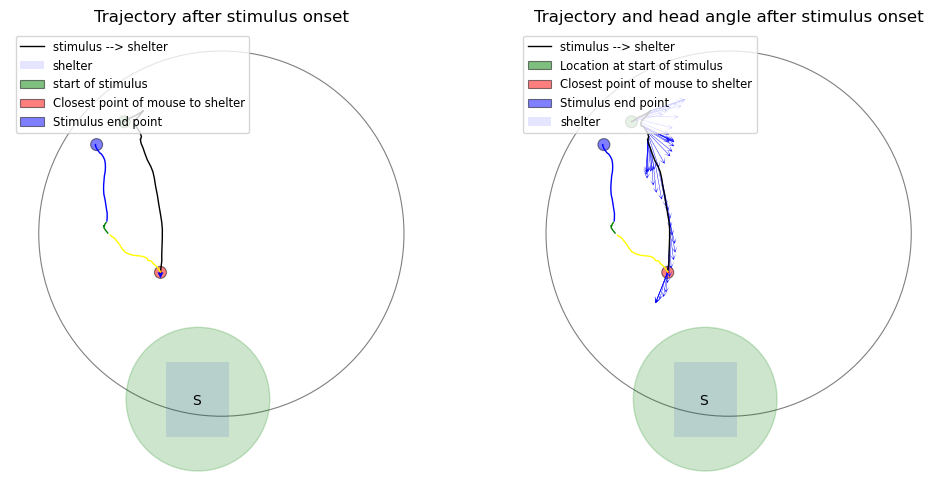

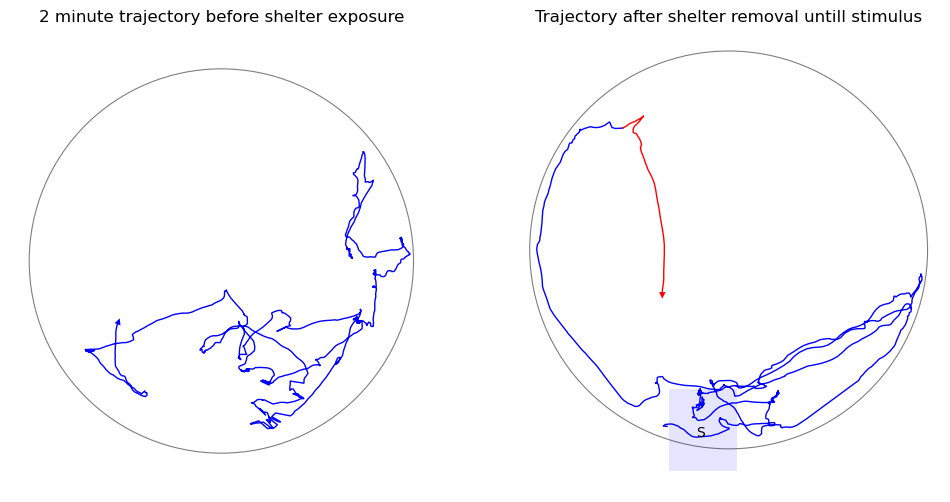

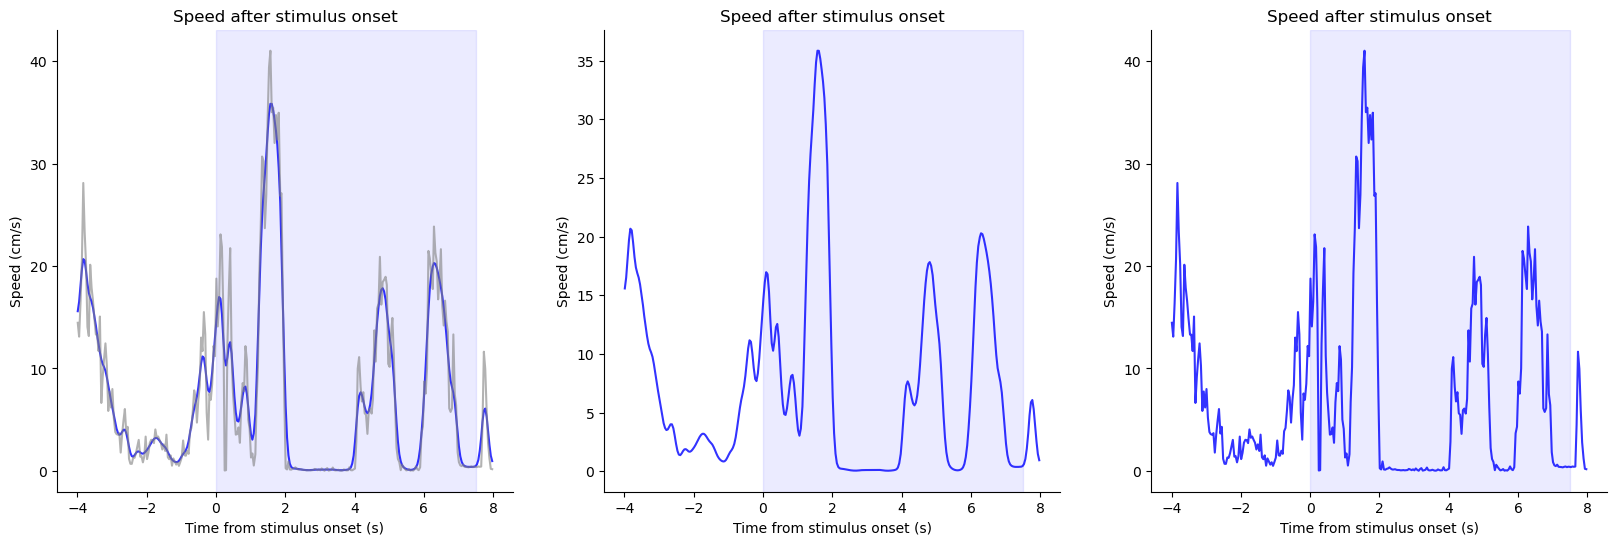

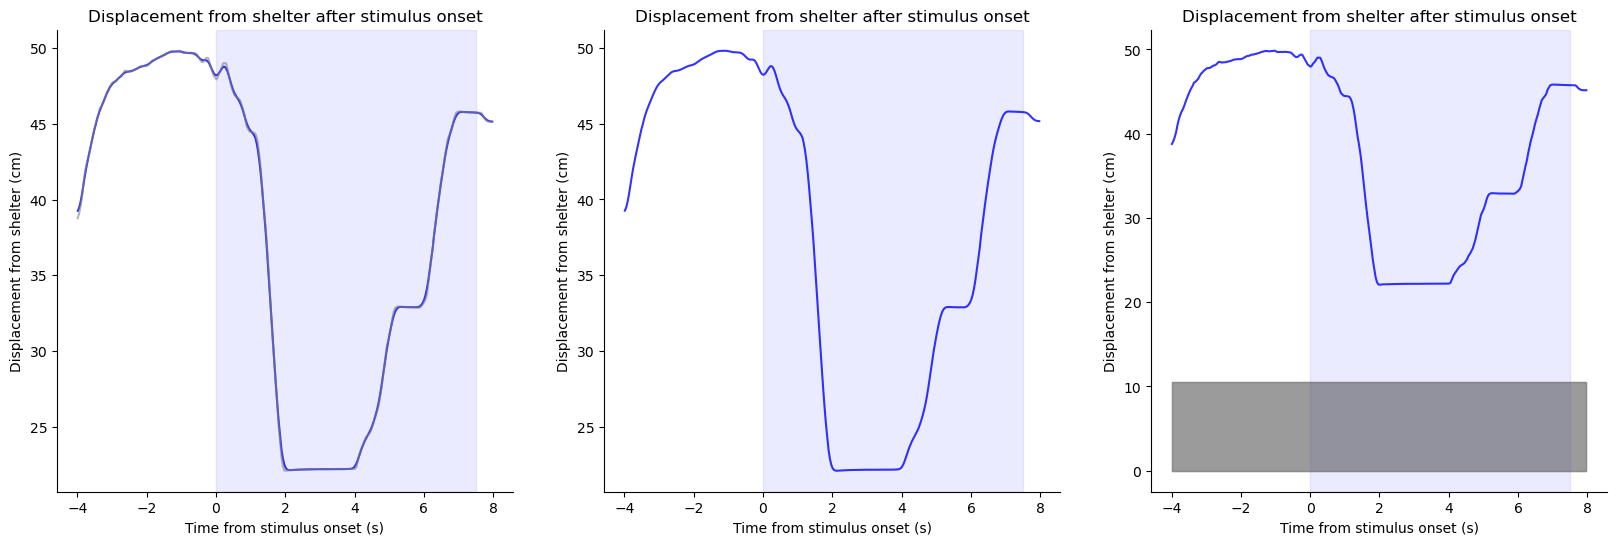

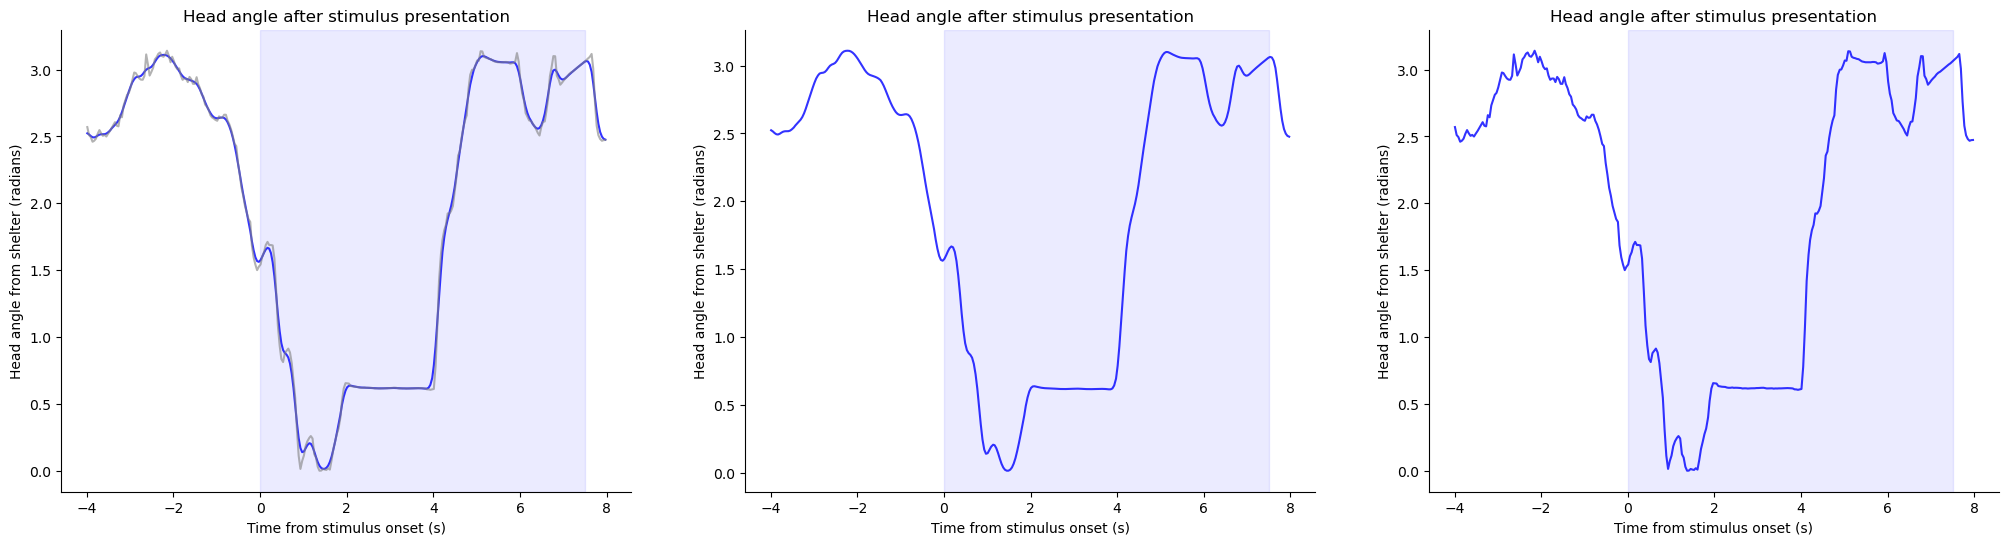

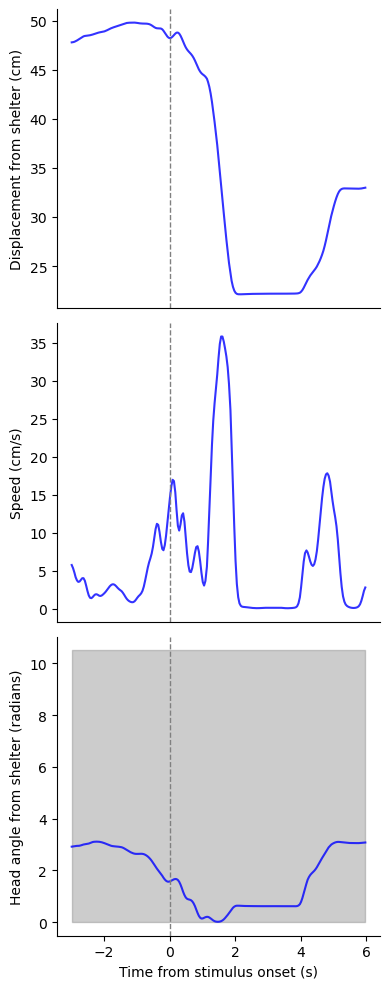

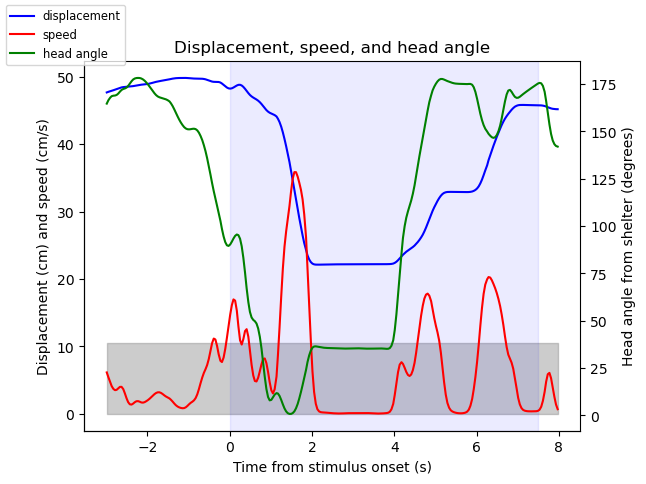

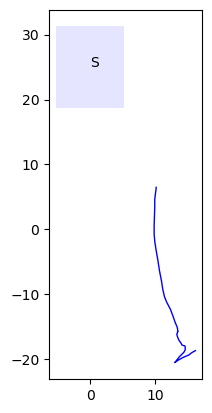

In [3]:
%run graphing_functions.ipynb

%run mouse3968_female_control_A2A_rerun.ipynb
M1_coord_scaled = coord_scaled
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_shelter_rotate_x = shelter_rotate_x
M1_shelter_rotate_y = shelter_rotate_y
M1_rotate = rotate
M1_coord_scaled_smooth = coord_scaled_smooth
M1_ratio = ratio

%run mouse4020_control_A2A_rerun.ipynb
M2_coord_scaled = coord_scaled
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_shelter_rotate_x = shelter_rotate_x
M2_shelter_rotate_y = shelter_rotate_y
M2_rotate = rotate
M2_coord_scaled_smooth = coord_scaled_smooth
M2_ratio = ratio


In [4]:
n=2

In [5]:
def compile_parameters(n, start_value, stop_value, step, dataframe):
    plt.figure()
    ax1=plt.axes()
    
    mice = [f'M{i}' for i in range(1, n+1)]

    df_disp = interpolate_all(n,start_value, stop_value, step, 'displacement', dataframe, False)
    summarize_data(df_disp, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df_disp['time']
    y = df_disp['average']
    y_up = df_disp['SEM_up']
    y_down = df_disp['SEM_down']

    ax1.plot(x,y, label = 'average displacement')
    ax1.plot(x,y_up, color = 'none')
    ax1.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax1.set_xlabel('Time from stimulus onset (s)')
    ax1.set_ylabel('Average displacement (cm) and speed (cm/s)') #convert to cm - cm/s
    
    ax1.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    df_speed = interpolate_all(n,start_value, stop_value, step, 'speed', dataframe, False)
    summarize_data(df_speed, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    y_min_shade = 0
    y_max_shade = 10.5

    # Fill the entire background from y_min_shade to y_max_shade
    plt.fill_between(x, y_min_shade, y_max_shade, color='gray', alpha=0.4)
    
    xs = df_speed['time']
    ys = df_speed['average']
    y_ups = df_speed['SEM_up']
    y_downs = df_speed['SEM_down']

    ax1.plot(xs,ys, color='red', label = 'average speed')
    ax1.plot(xs,y_ups, color = 'none')
    ax1.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    #ax1.legend(loc = 'upper right')
    # Collect handles and labels from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    
    df_angle = interpolate_all(n, start_value, stop_value, step, 'head_angle', dataframe, False) 
    summarize_data(df_angle, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    xa = df_angle['time']
    ya = df_angle['average']
    y_upa = df_angle['SEM_up']
    y_downa = df_angle['SEM_down']
    
    ax2 = ax1.twinx()
    ax2.plot(xa, ya, color = 'green', label = 'average head angle')
    ax2.set_ylabel('Head angle from shelter (radians)')
    ax2.plot(xa,y_upa, color = 'none')
    ax2.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa, y_upa, y_downa, color = 'green', alpha = .05)
    
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2
    plt.legend(handles, labels, loc='upper right', fontsize='small')
    return plt


In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf') 
    min_x = float('inf') 

    ratio = 0
    for i in range(1, n+1):
        ratio = ratio + globals()[f'M{i}_ratio']  
        
    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_title('Linearity')
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_xlabel('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 
    
    averageLinearityRatio = ratio/i
    print("The average linearity ratio is equal to... ") 
    print(averageLinearityRatio)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

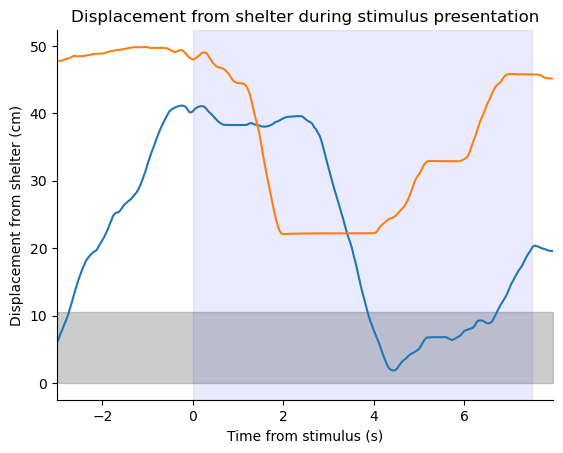

In [7]:
#parameters: number of mice (defined at top), start time, stop time, step (set to 25fps), parameter of interest, dataframe, whether you want to normalize
#just plotting to play around with different versions/compare - should try binning instead of gaussian filter
plot_all_displacement(n, -3,8, .04, 'displacement', 'coord_scaled', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

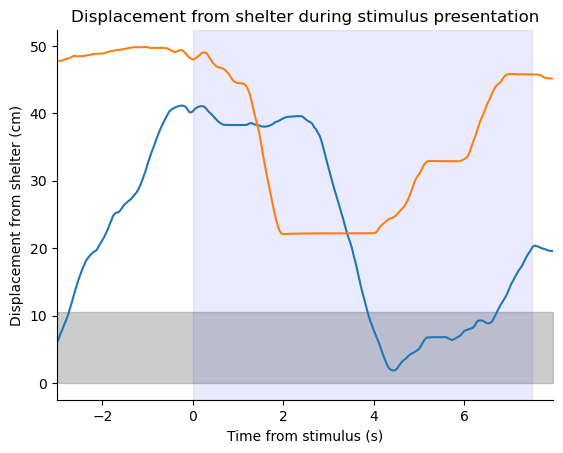

In [8]:
plot_all_displacement(n, -3, 8, .04, 'displacement', 'coord_scaled', False)
#displacement without any filter or normalization

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

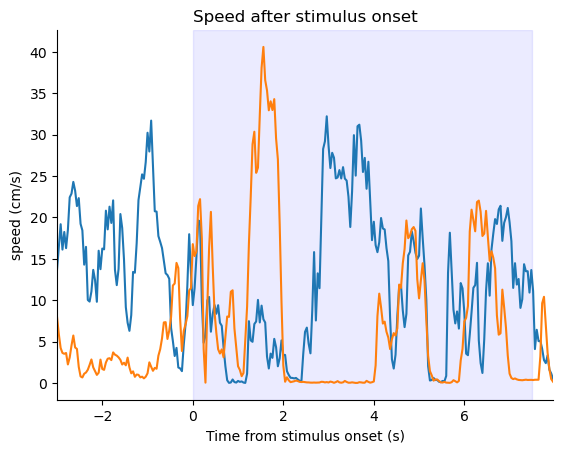

In [9]:
plot_all_speed(n, -3, 8, .04, 'speed', 'coord_scaled', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

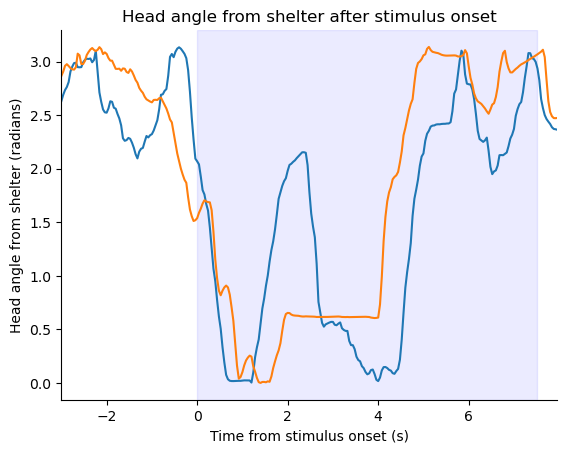

In [10]:
plot_all_angle(n, -3, 8, .04, 'head_angle', 'coord_scaled', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

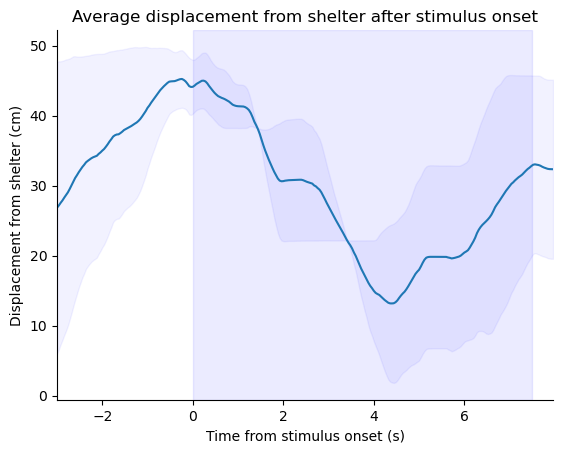

In [11]:
plot_compiled_displacement(n, -3, 8, .04, 'displacement', 'coord_scaled', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

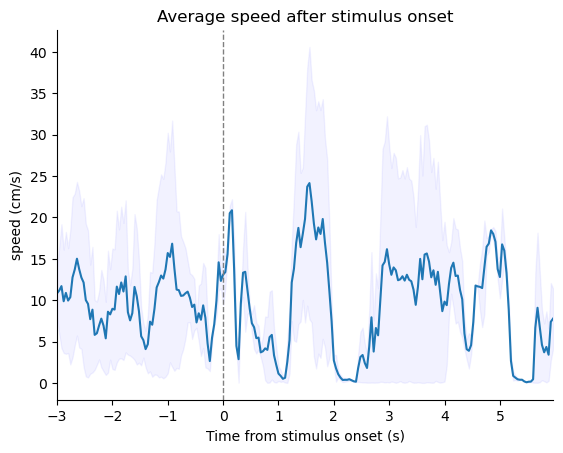

In [12]:
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

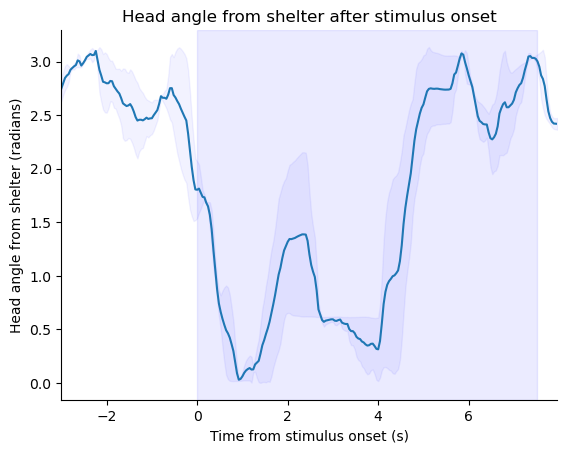

In [13]:
plot_compiled_angle(n, -3, 8, .04, 'head_angle', 'coord_scaled', False)

In [14]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']
def plot_compiled_trajectory(n):
    fig = plt.figure()  #create figure to fill in
    ax = plt.axes()
    
    for i in range (1, n+1):
        mice = mouse_columns(n, 'rotate')
        df = globals()[mice[i-1]]
        ax.plot(df['rotated_shift_x'], df['rotated__shift_y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['rotated_shift_x'].iloc[-1] #final x coordinate
        xo = df['rotated_shift_x'].iloc[-2] #second to last x coordinate

        yf = df['rotated__shift_y'].iloc[-1] #final y coordinate
        yo = df['rotated__shift_y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = colors[i-1], ec = "none")

    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")
    platform = Ellipse(xy = (1, 0), width = x_diam, height = y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    ax.add_patch(platform)
    shelter = patches.Rectangle(((0 - 5.25), (25-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.add_patch(shelter)

    
    ax.set_aspect('equal')
    ax.text(0-1,25-1, 'S', color = 'black', size = 10)

    
    ax.axis('off')
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

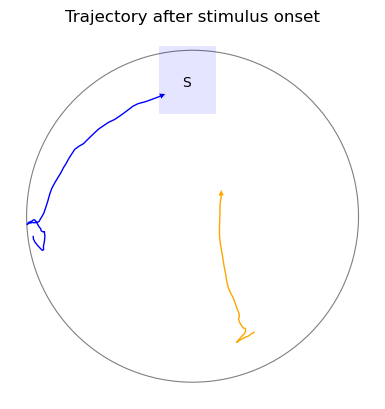

In [15]:
plot_compiled_trajectory(n)
#since the I'm shifting all the shelters to 0,25 some of the trajectories are shifted off of hte platform - use a different alignment method to avoid

The average linearity ratio is equal to... 
1.3277135105386084


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

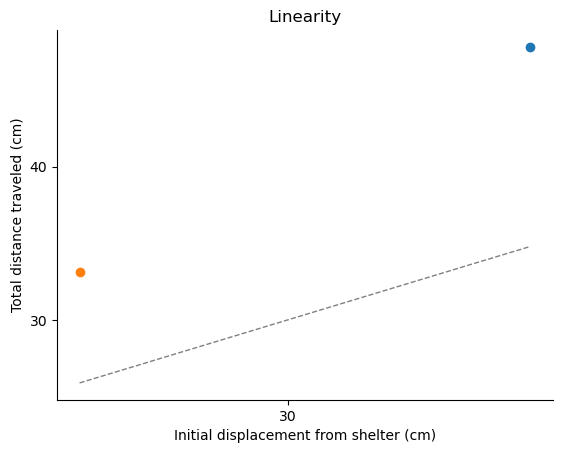

In [16]:
plot_linearity_ratio(n)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

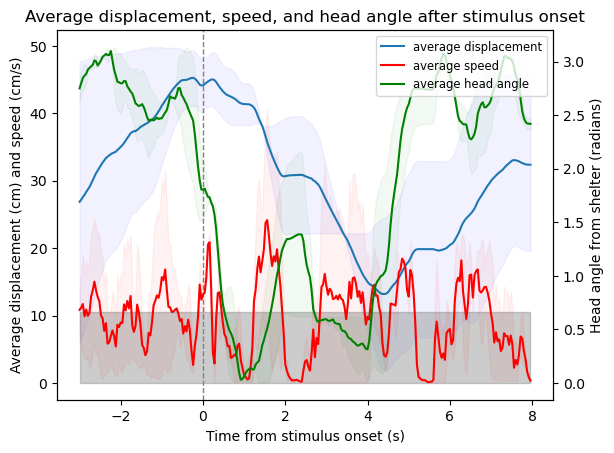

In [17]:
compile_parameters(n,-3, 8, .04, 'coord_scaled') #doesn't mean much because of normalization! reassess how to plot this/look at relationship!

In [18]:
#add graph for escapes (import escape for each mouse at top too)


In [19]:
#if you want graph with shelters in original positions, make sure the camera is in the same orientation each time, otherwise the stimuli are in different spots for different mice. 